<a href="https://colab.research.google.com/github/dengdualangininder/-AML/blob/main/%E4%B8%89%E5%90%88%E4%B8%80%E6%9C%80%E7%B5%82AML%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
import pandas as pd #資料處理
import numpy as np
import tensorflow as tf
from sklearn.linear_model import Lasso
#from sklearn.pipeline import make_pipeline # Construct a Pipeline from the given estimators.
from matplotlib import pyplot as plt

# MLtag
MLtag = pd.read_csv('gdrive/MyDrive/Hackathon/MLtag.csv')

# ML (rename use names=[])
ML = pd.read_csv('gdrive/MyDrive/Hackathon/ML.csv')

# Flatten the data, append class to features
data = ML.assign(guiltyid=MLtag['guiltyid'],levelofcrime=MLtag["levelofcrime"],typeofcrime=MLtag["typeofcrime"])

# Trim the data to include only labeled data.
new_data = data[data['typeofcrime'] != ("type1","type2","type3")]
replace_values = {'type1' : 1, 'type2' : 2, 'type3' : 3 ,"head":1,"colleague":0}
new_data["typeofcrime"]=new_data["typeofcrime"].map(replace_values) #string transfer into digital,type1=1 type2=2 type3=3
new_data["typeoffraud"]=new_data["typeoffraud"].map(replace_values) #string transfer into digital,type1=1 type2=2 type3=3
new_data["levelofcrime"]=new_data["levelofcrime"].map(replace_values)#string transfer into digital,head=1 colleague=0



new_data["frequency"]=new_data.groupby("sourceid")["sourceid"].transform("count") #add "frequency" column



In [4]:
# checking datatype
print(type(new_data.date[0]))

# convert to date
new_data['date'] = pd.to_datetime(new_data['date'])

# verify datatype
print(type(new_data.date[0]))
print(new_data)

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
     typeofaction  sourceid  destinationid  amountofmoney                date  \
0         cash-in     30105          28942         494528 2019-07-19 14:40:00   
1         cash-in     30105           8692         494528 2019-05-17 14:57:00   
2         cash-in     30105          60094         494528 2019-07-20 13:20:00   
3         cash-in     30105          20575         494528 2019-07-03 14:15:00   
4         cash-in     30105          45938         494528 2019-05-26 10:40:00   
...           ...       ...            ...            ...                 ...   
2335     transfer     14945          43793         106907 2019-03-29 14:53:00   
2336     transfer      9532          43793         106907 2019-04-13 13:19:00   
2337     transfer     27332          43793         106907 2019-05-10 09:34:00   
2338     transfer     32685          43793         106907 2019-07-08 12:20:00   
2339     transfer     26390          43793  

In [6]:
#合併資料
data = ML.assign(guiltyid=MLtag['guiltyid'],levelofcrime=MLtag["levelofcrime"],typeofcrime=MLtag["typeofcrime"])
new_data2=new_data.groupby(by=["sourceid"]).mean()
new_data2

<ipython-input-6-101a99764cdd>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_data2=new_data.groupby(by=["sourceid"]).mean()


,destinationid,amountofmoney,isfraud,typeoffraud,guiltyid,levelofcrime,typeofcrime,frequency
sourceid,,,,,,,,
61,68275.0,631490.0,0.0,NaN,NaN,NaN,NaN,1.0
185,6477.0,518689.0,1.0,3.0,86023.0,0.0,2.0,1.0
195,35270.0,335249.0,1.0,3.0,58869.0,0.0,3.0,1.0
226,42168.0,226479.0,1.0,3.0,43663.0,0.0,3.0,1.0
239,86839.0,478195.0,1.0,3.0,35428.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...
99775,45704.0,2873466.0,0.0,NaN,NaN,NaN,NaN,1.0
99897,90762.0,6763814.0,1.0,2.0,91404.0,0.0,2.0,1.0
99934,55222.0,3855137.0,0.0,NaN,NaN,NaN,NaN,1.0


In [7]:
new_data2=new_data2.drop("guiltyid",axis=1) #資料清洗汰除不需要的資訊

In [8]:
for i in range(len(new_data2)): #NA填值處理, typeoffraud
  if new_data2["typeoffraud"].iloc[(i):i+1].isna().values[0]== True:
    new_data2["typeoffraud"].iloc[(i):i+1].values[0] = 0

for i in range(len(new_data2)): #NA填值處理 , levelofcrime
  if new_data2["levelofcrime"].iloc[(i):i+1].isna().values[0]== True:
    new_data2["levelofcrime"].iloc[(i):i+1].values[0] = 0

for i in range(len(new_data2)): #NA填值處理 , typeofcrime
  if new_data2["typeofcrime"].iloc[(i):i+1].isna().values[0]== True:
    new_data2["typeofcrime"].iloc[(i):i+1].values[0] = 0

In [9]:
new_data2 #NA填值後

,destinationid,amountofmoney,isfraud,typeoffraud,levelofcrime,typeofcrime,frequency
sourceid,,,,,,,
61,68275.0,631490.0,0.0,0.0,0.0,0.0,1.0
185,6477.0,518689.0,1.0,3.0,0.0,2.0,1.0
195,35270.0,335249.0,1.0,3.0,0.0,3.0,1.0
226,42168.0,226479.0,1.0,3.0,0.0,3.0,1.0
239,86839.0,478195.0,1.0,3.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...
99775,45704.0,2873466.0,0.0,0.0,0.0,0.0,1.0
99897,90762.0,6763814.0,1.0,2.0,0.0,2.0,1.0
99934,55222.0,3855137.0,0.0,0.0,0.0,0.0,1.0


In [10]:
#isfraud數據平衡度檢查
df=new_data2["isfraud"].value_counts().to_frame()
df.iloc[0:2,:]


,isfraud
1.0,949
0.0,750


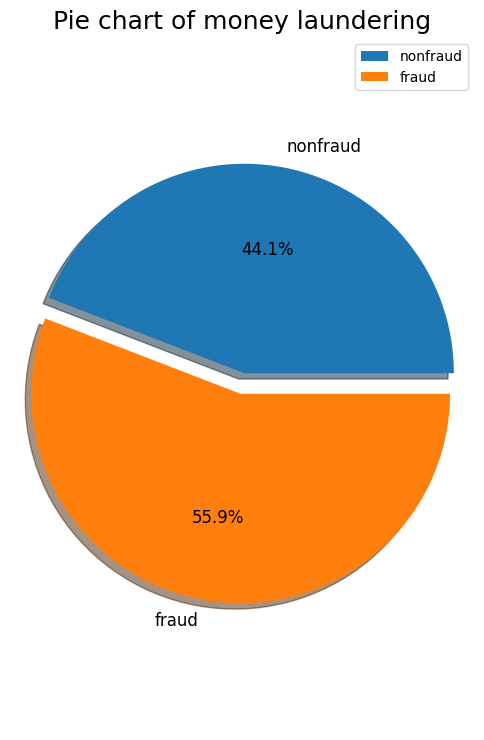

In [11]:
import pandas as pd               # 資料處理套件
import matplotlib.pyplot as plt   # 資料視覺化套件

plt.figure(figsize=(6,9))    # 顯示圖框架大小

isfraud=["nonfraud","fraud"]
amount=["750","949"]

labels = isfraud     # 製作圓餅圖的類別標籤
separeted = (0, 0.1)                  # 依據類別數量，分別設定要突出的區塊
size = amount                       # 製作圓餅圖的數值來源

plt.pie(size,                           # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        explode = separeted,            # 設定分隔的區塊位置
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=True)                    # 設定陰影

plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title("Pie chart of money laundering", {"fontsize" : 18})  # 設定標題及其文字大小
plt.legend(loc = "best")                                   # 設定圖例及其位置為最佳

plt.savefig("Pie chart of car accident.jpg",   # 儲存圖檔
            bbox_inches='tight',               # 去除座標軸占用的空間
            pad_inches=0.0)                    # 去除所有白邊


In [12]:
#split train test data #劃分訓練集&測試集

data = new_data2.dropna()

from sklearn.model_selection import train_test_split
# split the dataset
x_traindata,x_testdata,y_traindata,y_testdata = train_test_split(data.drop("isfraud", axis=1),data["isfraud"], test_size=0.3, random_state=0)



In [13]:
###handle imbalance data(oversampling)+logistic regression
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing, linear_model


X_re, y_re = SMOTE(random_state=42).fit_resample(x_traindata, y_traindata.astype('int'))

lr = linear_model.LogisticRegression(C=1).fit(X_re, y_re) # hyperparameter "C" is used to manage the regularization，f c becomes smaller then the more regularization will it be, to prevent overfitting
y_predictlogistic = lr.predict(x_testdata)

y_predictlogistic

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing, linear_model
X_re, y_re = SMOTE(random_state=42).fit_resample(x_traindata, y_traindata.astype('int'))
y_re.value_counts()

0    645
1    645
Name: isfraud, dtype: int64

In [16]:
###lasso regression
lasso = Lasso(tol=1e-2,alpha=10)
model=lasso.fit(X_re, y_re)
y_predictlasso=model.predict(x_testdata)
y_predictlasso #lasso 的預測值

array([0.53958247, 0.63114646, 0.65399335, 0.51745628, 0.4875383 ,
       0.51166833, 0.53958244, 0.51166833, 0.43066943, 0.56124799,
       0.45716812, 0.41033531, 0.71447945, 0.42322888, 0.437914  ,
       0.45819698, 0.51132761, 0.50595024, 0.47335537, 0.69822831,
       0.540726  , 0.51132761, 0.53958247, 0.58114686, 0.63240004,
       0.56875097, 0.34275365, 0.51908836, 0.55889998, 0.47400388,
       0.33701279, 0.51359753, 0.58819708, 0.62613151, 0.48854051,
       0.51132761, 0.32155286, 0.49763866, 0.48039054, 0.69111895,
       0.59931064, 0.45776829, 0.4543444 , 0.51166833, 0.39929709,
       0.62293934, 0.35177625, 0.51735781, 0.5174563 , 0.41640866,
       0.4390808 , 0.44115135, 0.62774672, 0.59998177, 0.3886388 ,
       0.43558802, 0.46263933, 0.65941789, 0.43344558, 0.35967115,
       0.39624606, 0.49763866, 0.36215207, 0.58116283, 0.62175714,
       0.44748947, 0.66888547, 0.34981957, 0.51166833, 0.41424059,
       0.46185805, 0.52583156, 0.5174563 , 0.45230487, 0.53958

In [17]:
pd.Series(dict(zip(list(x_testdata), lasso.coef_)))

destinationid    2.400134e-06
amountofmoney    2.267968e-08
typeoffraud      0.000000e+00
levelofcrime     0.000000e+00
typeofcrime      0.000000e+00
frequency        0.000000e+00
dtype: float64

In [18]:
#lasso選出最重要變數變數destinationid & amountofmoney
lasso_coefs = pd.Series(dict(zip(list(x_testdata), lasso.coef_)))
coefs = pd.DataFrame(dict(Coefficient=lasso_coefs))
coid = coefs[coefs['Coefficient'] > 0].index
coefs.T.iloc[:,:]
coefs["Coefficient"].T

destinationid    2.400134e-06
amountofmoney    2.267968e-08
typeoffraud      0.000000e+00
levelofcrime     0.000000e+00
typeofcrime      0.000000e+00
frequency        0.000000e+00
Name: Coefficient, dtype: float64

In [19]:
#洗錢與各變數之相關性
cordf=new_data2.corr()
cordf=cordf["isfraud"].to_frame().T
cordf

,destinationid,amountofmoney,isfraud,typeoffraud,levelofcrime,typeofcrime,frequency
isfraud,0.129238,0.101407,1.0,0.939995,0.052218,0.758252,0.046671


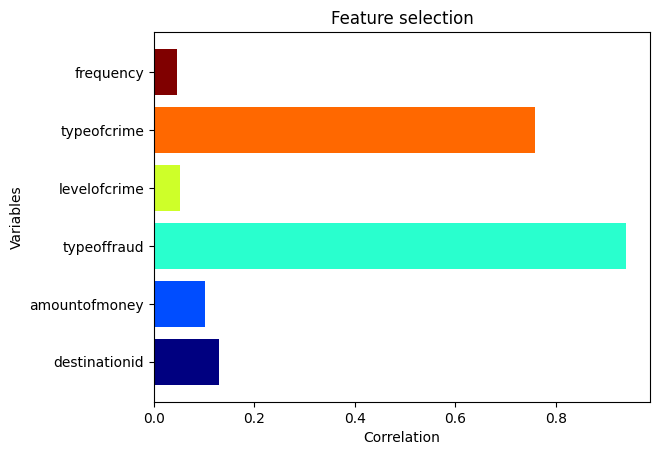

In [20]:
#correlation作圖
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
variables=['destinationid', 'amountofmoney','typeoffraud',"levelofcrime","typeofcrime","frequency"]
correlation = [0.129238,0.101407,0.939995,0.052218,0.758252,0.046671]
cmap = cm.jet(np.linspace(0, 1, len(variables)))
x = np.arange(len(variables))

plt.barh(x, correlation, color=cmap)
plt.yticks(x, variables)
plt.ylabel('Variables')
plt.xlabel('Correlation')
plt.title('Feature selection')
plt.show()

In [27]:
from keras.regularizers import l2



# build the sequential model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(166),
  tf.keras.layers.Dense(128, activation='relu'),  # 增加神經元數量
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),  # 增加神經元數量
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=l2(0.01)),  # 添加L2正則化
  #tf.keras.layers.Dense(2, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from keras import backend as K #轉換dataframe to tensor
x_train = K.cast_to_floatx(X_re)
y_train = K.cast_to_floatx(y_re)

# train the model
model.fit(x_train, y_train, epochs = 10)
# test the model
test_loss, test_acc = model.evaluate(x_testdata, y_testdata, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
# A Softmax layer converts the Logit output to probabilities
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

# Use the model to predict the class of the test data
y_predictsequential = probability_model.predict(x_testdata)
y_predictsequential #sequential model的預測值

Epoch 1/10
41/41 [==============================] - 3s 6ms/step - loss: 65327.9336 - accuracy: 0.5016
Epoch 2/10
41/41 [==============================] - 0s 4ms/step - loss: 14271.1084 - accuracy: 0.5264
Epoch 3/10
41/41 [==============================] - 0s 4ms/step - loss: 5573.6953 - accuracy: 0.5202
Epoch 4/10
41/41 [==============================] - 0s 4ms/step - loss: 3560.7605 - accuracy: 0.5279
Epoch 5/10
41/41 [==============================] - 0s 4ms/step - loss: 2185.9287 - accuracy: 0.5171
Epoch 6/10
41/41 [==============================] - 0s 5ms/step - loss: 2066.6555 - accuracy: 0.5093
Epoch 7/10
41/41 [==============================] - 0s 4ms/step - loss: 1742.7273 - accuracy: 0.5240
Epoch 8/10
41/41 [==============================] - 0s 4ms/step - loss: 1453.4293 - accuracy: 0.5140
Epoch 9/10
41/41 [==============================] - 0s 5ms/step - loss: 1149.2181 - accuracy: 0.5124
Epoch 10/10
41/41 [==============================] - 0s 4ms/step - loss: 440.3334 - accur

array([[0.26894143, 0.7310586 ],
       [0.52670187, 0.47329804],
       [0.52670187, 0.47329804],
       ...,
       [0.5267019 , 0.4732981 ],
       [0.5267019 , 0.4732981 ],
       [0.5267019 , 0.4732981 ]], dtype=float32)

In [ ]:
#cross validation and combine three model
#from sklearn.model_selection import cross_val_score
#from sklearn import datasets
#from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
#import numpy as np
#scores = cross_val_score(lr,x_traindata,y_traindata,cv=20,scoring='accuracy')
#print(scores)
#print(scores.mean())

In [43]:
y_testdata

sourceid
84359     1.0
76162     1.0
48977     1.0
100000    1.0
63802     1.0
         ... 
54421     1.0
97143     1.0
51984     1.0
16272     1.0
84344     0.0
Name: isfraud, Length: 525, dtype: float64

In [117]:
y_traindata

sourceid
28562    0.0
73055    0.0
71269    0.0
49153    0.0
44454    1.0
        ... 
46436    0.0
68789    1.0
94658    1.0
30553    1.0
37792    0.0
Name: isfraud, Length: 1224, dtype: float64

In [119]:
y_traindata.iloc[0:525]

sourceid
28562    0.0
73055    0.0
71269    0.0
49153    0.0
44454    1.0
        ... 
9735     1.0
12303    0.0
9277     1.0
80401    0.0
20909    0.0
Name: isfraud, Length: 525, dtype: float64

In [150]:
#機密, 最優化三種模型組合之權重, 類似Stacking將base leaner預測值作為特徵+再放入自組的meta leaner(三個模型的線性組合，模型參數用BFGS估計)做最終預測
import numpy as np
from scipy.optimize import minimize
from pandas.core.frame import DataFrame

# 假設 y_predictlogistic、y_predictlasso 和 y_predictsequential 是有效的數組或列表
# 假設 y_testdata 是有效的數組或列表

x1 = y_predictlogistic
x2 = y_predictlasso
x3raw = DataFrame(y_predictsequential)
x3 = np.array(x3raw[0])

def f(b):
    b1 = b[0]
    b2 = b[1]
    b3 = b[2]
    #b4 = b[3]
    return sum(((b1 * x1) + (b2 * x2) + (b3 * x3)  - y_testdata) ** 2)

b0 = [0, 0, 0]  # 初始猜測值
Result = minimize(f, b0, method="BFGS")  # 使用BFGS算法進行最優化
Result.x


array([ 0.48085832,  0.8970119 , -0.62551749])

In [151]:
#最終判定結果輸出
B1=Result.x[0]
B2=Result.x[1]
B3=Result.x[2]

import numpy as np

x = B1*x1+B2*x2+B3*x3
xx = x.tolist()

for i in range(len(x)):
    if xx[i] >= 0.7:
        xx[i] = "Fraud"
    elif xx[i] <= 0.3:
        xx[i] = "Nonfraud"
    else:
        xx[i] = "Warning"

yy = np.array(xx)

print(yy)

['Fraud' 'Fraud' 'Fraud' 'Fraud' 'Warning' 'Fraud' 'Fraud' 'Fraud'
 'Warning' 'Warning' 'Warning' 'Warning' 'Fraud' 'Warning' 'Warning'
 'Warning' 'Fraud' 'Warning' 'Warning' 'Fraud' 'Warning' 'Fraud' 'Fraud'
 'Warning' 'Fraud' 'Warning' 'Warning' 'Warning' 'Warning' 'Warning'
 'Warning' 'Warning' 'Warning' 'Fraud' 'Warning' 'Fraud' 'Warning'
 'Warning' 'Warning' 'Fraud' 'Warning' 'Warning' 'Warning' 'Fraud'
 'Warning' 'Fraud' 'Warning' 'Warning' 'Fraud' 'Warning' 'Warning'
 'Warning' 'Fraud' 'Warning' 'Warning' 'Warning' 'Warning' 'Fraud'
 'Warning' 'Warning' 'Warning' 'Warning' 'Warning' 'Warning' 'Fraud'
 'Warning' 'Fraud' 'Warning' 'Fraud' 'Warning' 'Warning' 'Warning' 'Fraud'
 'Warning' 'Fraud' 'Warning' 'Warning' 'Fraud' 'Fraud' 'Fraud' 'Warning'
 'Fraud' 'Warning' 'Fraud' 'Warning' 'Warning' 'Warning' 'Warning'
 'Warning' 'Warning' 'Fraud' 'Warning' 'Warning' 'Warning' 'Warning'
 'Warning' 'Warning' 'Warning' 'Warning' 'Fraud' 'Fraud' 'Warning'
 'Warning' 'Warning' 'Warning' 'Wa

In [152]:
#y_testdata轉string結果輸出

ytest= y_testdata.tolist()

for i in range(len(x)):
    if ytest[i] >= 0.7:
        ytest[i] = "Fraud"
    elif ytest[i] <= 0.3:
        ytest[i] = "Nonfraud"
    else:
        ytest[i] = "Warning"

yytest = np.array(ytest)

print(yytest)

['Fraud' 'Fraud' 'Fraud' 'Fraud' 'Fraud' 'Fraud' 'Fraud' 'Fraud'
 'Nonfraud' 'Nonfraud' 'Fraud' 'Fraud' 'Fraud' 'Nonfraud' 'Fraud'
 'Nonfraud' 'Fraud' 'Warning' 'Fraud' 'Fraud' 'Fraud' 'Fraud' 'Fraud'
 'Nonfraud' 'Fraud' 'Fraud' 'Fraud' 'Nonfraud' 'Fraud' 'Nonfraud'
 'Nonfraud' 'Fraud' 'Nonfraud' 'Fraud' 'Fraud' 'Fraud' 'Fraud' 'Fraud'
 'Nonfraud' 'Fraud' 'Warning' 'Fraud' 'Fraud' 'Fraud' 'Nonfraud' 'Fraud'
 'Fraud' 'Nonfraud' 'Fraud' 'Nonfraud' 'Nonfraud' 'Nonfraud' 'Nonfraud'
 'Nonfraud' 'Fraud' 'Nonfraud' 'Warning' 'Fraud' 'Nonfraud' 'Nonfraud'
 'Fraud' 'Fraud' 'Nonfraud' 'Nonfraud' 'Fraud' 'Warning' 'Fraud'
 'Nonfraud' 'Fraud' 'Nonfraud' 'Nonfraud' 'Fraud' 'Fraud' 'Nonfraud'
 'Fraud' 'Warning' 'Fraud' 'Nonfraud' 'Fraud' 'Fraud' 'Nonfraud' 'Fraud'
 'Nonfraud' 'Fraud' 'Fraud' 'Fraud' 'Warning' 'Nonfraud' 'Nonfraud'
 'Nonfraud' 'Fraud' 'Fraud' 'Fraud' 'Nonfraud' 'Nonfraud' 'Fraud' 'Fraud'
 'Fraud' 'Nonfraud' 'Fraud' 'Nonfraud' 'Nonfraud' 'Fraud' 'Nonfraud'
 'Nonfraud' 'Fraud' 'Nonfrau

In [153]:
correct = yytest[yy == yytest]
incorrect = yytest[yy != yytest]
len(correct)

104

In [154]:
#加上roc/auc and混淆矩陣
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
confusion_matrix(yytest,yy,labels=["Fraud","Nonfraud"])

array([[93,  0],
       [13,  0]])

In [ ]:
#y_testdata轉binary

ybinarydata=y_testdata.tolist()

for i in range(len(x)):
    if ybinarydata[i] >= 0.5:
        ybinarydata[i] = 1
    else:
        ybinarydata[i] = 0

ybinarydata

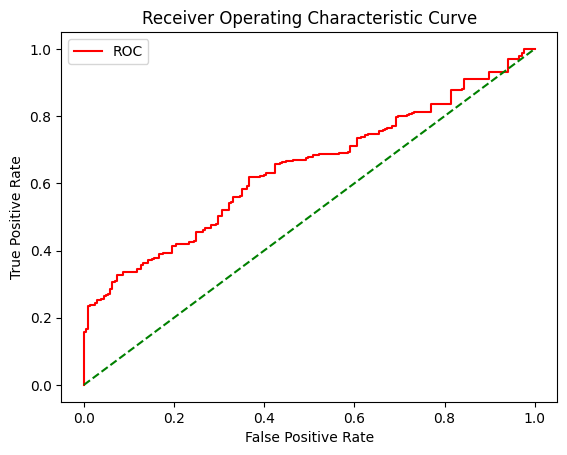

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()




fper, tper, thresholds = roc_curve(ybinarydata,np.array(x))
plot_roc_curve(fper, tper)

In [157]:
#AUC
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(ybinarydata,np.array(x))
print(auc_score)

0.6428810975609756
